In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import math
import time
import random

In [2]:
os.chdir("E:/AI/assignment_2_online")

In [3]:
romania=pd.read_pickle("romania_graph.pickle")
atlanta=pd.read_pickle("atlanta_osm.pickle")

In [4]:
print(nx.info(atlanta))

Name: 
Type: Graph
Number of nodes: 252791
Number of edges: 271652
Average degree:   2.1492


In [5]:
def getpath(middlepoint, explored1,explored2,start,goal):
    invers_halfpath=[middlepoint]
    while True:
        next=invers_halfpath[-1]
        if next==start:
            break
        else:
            invers_halfpath.append(explored1[next][1])
    halfpath=[middlepoint]
    while True:
        next=halfpath[-1]
        if next==goal:
            break
        else:
            halfpath.append(explored2[next][1])
    path=invers_halfpath[::-1]+halfpath[1:]
    return path

In [6]:
def nextexplording(frontier):
    shortest_dist=float('inf')
    for key, value in frontier.items():           
        if value[0]<shortest_dist:
            shortest_dist=value[0]
            to_be_explored=key
    return to_be_explored

In [10]:
def expandfrontier(graph,to_be_explored,frontier,explored):
    for key,value in graph[to_be_explored].items():
        if key in explored.keys():
            continue
        if key in frontier.keys():
            new_distance=frontier[to_be_explored][0]+value['weight']
            if new_distance<frontier[key][0]:
                frontier[key]=(new_distance,to_be_explored)
        else:
            distance=frontier[to_be_explored][0]+value['weight']
            frontier[key]=(distance,to_be_explored)
    return frontier

In [98]:
def tridirection_ucs(graph,A, B, C):
    start_time=time.time()
    frontierA={A:(0,"A")}
    frontierB={B:(0,"B")}
    frontierC={C:(0,'C')}
    exploredA={}
    exploredB={}
    exploredC={}
    num_middlepoint=0
    middlepoint={}
    while True:
        if frontierA=={} or frontierB=={} or frontierC=={}:
            print("Failed to find a path.")
            eclipse_time=time.time()-start_time
            return "Falied to find the path.",0,eclipse_time
            break
        to_be_exploredA=nextexplording(frontierA)
        exploredA[to_be_exploredA]=frontierA[to_be_exploredA]
        to_be_exploredB=nextexplording(frontierB)
        exploredB[to_be_exploredB]=frontierB[to_be_exploredB] 
        to_be_exploredC=nextexplording(frontierC)
        exploredC[to_be_exploredC]=frontierC[to_be_exploredC]  
        frontierA=expandfrontier(graph,to_be_exploredA,frontierA,exploredA)
        frontierB=expandfrontier(graph,to_be_exploredB,frontierB,exploredB)
        frontierC=expandfrontier(graph,to_be_exploredC,frontierC,exploredC)
        frontierA.pop(to_be_exploredA)
        frontierB.pop(to_be_exploredB)
        frontierC.pop(to_be_exploredC)
        if 'AB' not in middlepoint.keys():
            if to_be_exploredA in exploredB.keys():
                middlepoint['AB']=to_be_exploredA
                num_middlepoint+=1
            elif to_be_exploredB in exploredA.keys():
                middlepoint['AB']=to_be_exploredB
                num_middlepoint+=1
        if num_middlepoint==2:
            break
        if 'AC' not in middlepoint.keys():
            if to_be_exploredA in exploredC.keys():
                middlepoint['AC']=to_be_exploredA
                num_middlepoint+=1
            elif to_be_exploredC in exploredA.keys():
                middlepoint['AC']=to_be_exploredC
                num_middlepoint+=1
        if num_middlepoint==2:
            break
        if 'BC' not in middlepoint.keys():
            if to_be_exploredB in exploredC.keys():
                middlepoint['BC']=to_be_exploredB
                num_middlepoint+=1
            elif to_be_exploredC in exploredB.keys():
                middlepoint['BC']=to_be_exploredC
                num_middlepoint+=1
        if num_middlepoint==2:
            break
    if 'AB' in middlepoint.keys():
        pathAB=getpath(middlepoint['AB'], exploredA,exploredB,A,B)
    if 'AC' in middlepoint.keys():
        pathAC=getpath(middlepoint['AC'], exploredA,exploredC,A,C)
    if 'BC' in middlepoint.keys():
        pathBC=getpath(middlepoint['BC'], exploredB,exploredC,B,C)
    if 'AB' not in middlepoint.keys():
        path=pathAC+pathBC[::-1][1:]
        distance=exploredA[middlepoint['AC']][0]+exploredC[middlepoint['AC']][0]+exploredB[middlepoint['BC']][0]+exploredC[middlepoint['BC']][0]
    elif 'AC' not in middlepoint.keys():
        path=pathAB+pathBC[1:]
        distance=exploredA[middlepoint['AB']][0]+exploredB[middlepoint['AB']][0]+exploredB[middlepoint['BC']][0]+exploredC[middlepoint['BC']][0]
    elif 'BC' not in middlepoint.keys():
        path=pathAB[::-1]+pathAC[1:]
        distance=exploredA[middlepoint['AB']][0]+exploredB[middlepoint['AB']][0]+exploredA[middlepoint['AC']][0]+exploredC[middlepoint['AC']][0]
    time_eclipse=time.time()-start_time
    return path,distance,time_eclipse

In [99]:
time1=0
for i in range(1):
    A,B,C=random.sample(romania.nodes(),3)
    path,distance,eclipse_time=tridirection_ucs(romania,A,B,C)
    time1+=eclipse_time
print("Average time needed for tri-direction ucs is %f."%(time1/(i+1)))  
    

Average time needed for tri-direction ucs is 0.000000.


In [100]:
print("A,B,C:",A,B,C)

A,B,C: i e s


In [101]:
path

['i', 'v', 'u', 'h', 'e', 'h', 'u', 'b', 'p', 'r', 's']

C:\Users\huimi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\huimi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\huimi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


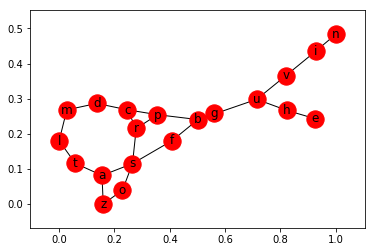

In [23]:
nx.draw_networkx(romania)

In [102]:
time2=0
for i in range(100):
    A,B,C=random.sample(atlanta.nodes(),3)
    path,distance,eclipse_time=tridirection_ucs(atlanta,A,B,C)
    time2+=eclipse_time
print("Average time needed for tri-direction ucs is %f."%(time2/(i+1)))  

Failed to find a path.
Failed to find a path.
Failed to find a path.
Failed to find a path.
Failed to find a path.
Failed to find a path.
Average time needed for tri-direction ucs is 5.059297.


Summary: The average time needed to find a path connecting three nodes using tridirection-ucs is 5.05s.